## Read and Split the Data

get the data  -> unzip the data -> import the libraries -> count the number -> create folder for train, test and validation -> move data from one folder to another.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#  unzip data
!unzip /content/Brain_Tumor_Dataset.zip

Archive:  /content/Brain_Tumor_Dataset.zip
   creating: Brain_Tumor_Dataset/Brain_Tumor/
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y1.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y10.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y100.JPG  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y101.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y102.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y103.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y104.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y105.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y106.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y107.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y108.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y109.JPG  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y11.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y111.JPG  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y112.JPG  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y113.JPG  
  inflating: Brain_

In [4]:
# import the libraries

import os
import glob
import shutil
import math
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# count the number of images

ROOT_DIR = "/content/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Healthy', 98), ('Brain_Tumor', 155)])

In [6]:
def splitData(path,split):

  if not os.path.exists("./" + path):
    os.mkdir("./" + path)
    
    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./" + path + "/" + dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                  size = (math.floor(split*number_of_images[dir])-2),
                                  replace = False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./" + path , dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print("The folder already exists")

In [7]:
splitData("val", 0.10 )

In [8]:
# count the number of images

ROOT_DIR = "/content/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Healthy', 91), ('Brain_Tumor', 142)])

In [9]:
splitData("test", 0.10)

In [10]:
# count the number of images

ROOT_DIR = "/content/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Healthy', 84), ('Brain_Tumor', 130)])

In [11]:
splitData("train", 1)

In [12]:
# count the number of images

ROOT_DIR = "/content/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Healthy', 2), ('Brain_Tumor', 2)])

## Pre process the data

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet_v2 import preprocess_input

In [13]:
image_data_1 = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rotation_range = 40,
                                horizontal_flip = True, preprocessing_function= preprocess_input)

train_image = image_data_1.flow_from_directory(directory = '/content/train', target_size = (224,224), batch_size = 32, class_mode = 'binary')

Found 210 images belonging to 2 classes.


In [15]:
image_data_2 = ImageDataGenerator(preprocessing_function= preprocess_input)

test_image = image_data_2.flow_from_directory(directory = '/content/test', target_size = (224,224), batch_size = 32, class_mode = 'binary')

Found 19 images belonging to 2 classes.


In [16]:
val_image = image_data_2.flow_from_directory(directory = '/content/val', target_size = (224,224), batch_size = 32, class_mode = 'binary')

Found 20 images belonging to 2 classes.


## Training the model

In [17]:
import keras
from keras.layers import Dense, Flatten
from keras.models import Model, load_model
from keras.applications.resnet_v2 import ResNet50V2

In [18]:
base_model = ResNet50V2(input_shape = (224,224,3), include_top = False)

94668760/94668760 [==============================] - 6s 0us/step


In [19]:
for layer in base_model.layers:
  layer.trainable = False

In [20]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [21]:
custom_layer = Flatten()(base_model.output)
custom_layer = Dense(units = 1, activation = 'sigmoid')(custom_layer)

model = Model(base_model.input, custom_layer)

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [28]:
# compile

model.compile(optimizer = 'adam', loss = keras.losses.BCE, metrics = ['accuracy'])

In [26]:
# early stop and checkpoints

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01, patience = 3, verbose = 1, mode = 'auto')
mcp = ModelCheckpoint(monitor='val_accuracy', filepath= './bestmodel.h5', verbose = 1, save_best_only = True, mode = 'auto')

cb = [es, mcp]

In [42]:
history = model.fit(train_image, epochs = 20, verbose = 1, callbacks = cb, validation_data = val_image)

Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.0986 - accuracy: 0.9619
Epoch 1: val_accuracy did not improve from 1.00000
7/7 [==============================] - 3s 418ms/step - loss: 0.0986 - accuracy: 0.9619 - val_loss: 0.4531 - val_accuracy: 0.9000
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.0701 - accuracy: 0.9667
Epoch 2: val_accuracy did not improve from 1.00000
7/7 [==============================] - 3s 395ms/step - loss: 0.0701 - accuracy: 0.9667 - val_loss: 0.2784 - val_accuracy: 0.9000
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9524
Epoch 3: val_accuracy did not improve from 1.00000
7/7 [==============================] - 4s 533ms/step - loss: 0.1558 - accuracy: 0.9524 - val_loss: 0.3219 - val_accuracy: 0.8500
Epoch 4/20
7/7 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9857
Epoch 4: val_accuracy did not improve from 1.00000
7/7 [==============================] - 3s

In [30]:
import matplotlib.pyplot as plt

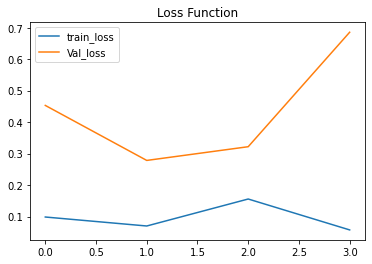

In [43]:
# loss function

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss Function')
plt.legend(['train_loss', 'Val_loss'])
plt.show()

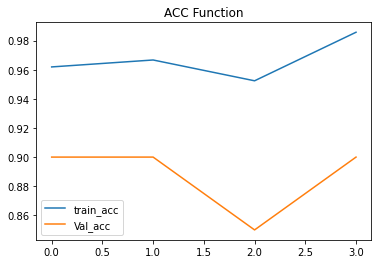

In [44]:
# accuarcy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('ACC Function')
plt.legend(['train_acc', 'Val_acc'])
plt.show()

In [45]:
# model accuracy

from keras.models import load_model

best_model = load_model("/content/bestmodel.h5")

In [46]:
loss, acc = model.evaluate(test_image) 
print('The accuracy score is', acc)

1/1 [==============================] - 0s 161ms/step - loss: 0.3387 - accuracy: 0.9474
The accuracy score is 0.9473684430122375


In [47]:
y_pred = model.predict(test_image, verbose = 1)

1/1 [==============================] - 0s 85ms/step


In [48]:
y_pred_classes = (y_pred > 0.5).astype("int32")

In [49]:
y_pred

array([[7.1237487e-19],
       [8.8879661e-11],
       [9.9811399e-01],
       [6.7527247e-12],
       [3.9991137e-06],
       [2.6113234e-09],
       [9.8625356e-01],
       [6.8695851e-02],
       [6.8896085e-02],
       [2.4690325e-10],
       [6.0144928e-03],
       [3.4920995e-16],
       [1.0000000e+00],
       [9.9999177e-01],
       [9.9999917e-01],
       [1.0000000e+00],
       [2.6113234e-09],
       [9.9994218e-01],
       [1.0000000e+00]], dtype=float32)

In [50]:
y_pred_classes

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

## Make Prediction

In [39]:
from keras.utils.image_utils import img_to_array, load_img

In [41]:
path = "/content/Brain_Tumor_Dataset/Healthy/11 no.jpg"

img = load_img(path, target_size = (224,224))

input_arr = img_to_array(img)/255

input_array = np.expand_dims(input_arr, axis =0)

pred_prob = model.predict(input_array)

pred_value = (pred_prob > 0.5).astype("int32")

if pred_value == 0:
  print("Brain Tumor")
else:
  print("Healthy")


1/1 [==============================] - 1s 1s/step
Healthy


In [51]:
path = "/content/Brain_Tumor_Dataset/Brain_Tumor/Y59.JPG"

img = load_img(path, target_size = (224,224))

input_arr = img_to_array(img)/255

input_array = np.expand_dims(input_arr, axis =0)

pred_prob = model.predict(input_array)

pred_value = (pred_prob > 0.5).astype("int32")

if pred_value == 0:
  print("Brain Tumor")
else:
  print("Healthy")

1/1 [==============================] - 0s 24ms/step
Brain Tumor
